In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(font_scale=1.2)
from sklearn import svm
%matplotlib inline

In [25]:
df= pd.read_csv("C:/Users/SurfaceBook/Downloads/Machine Learning Full (1)/Machine Learning Tutorial Part 1 _ 2/Cupcakes vs Muffins.csv")
food=df

In [26]:
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [18]:
df.tail()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
15,Cupcake,42,18,25,9,5,1,0,0
16,Cupcake,36,14,21,14,11,2,1,0
17,Cupcake,38,15,31,8,6,1,1,0
18,Cupcake,36,16,24,12,9,1,1,0
19,Cupcake,34,17,23,11,13,0,1,0


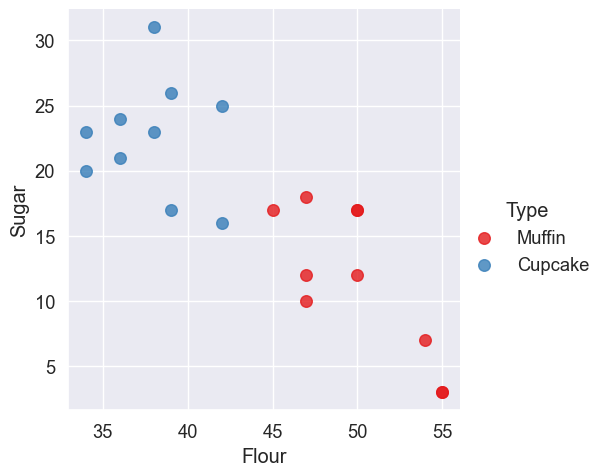

In [40]:
sns.lmplot(food,x='Flour',y='Sugar',hue='Type',
           palette='Set1',fit_reg=False, scatter_kws={"s": 70});

In [44]:
Type_Label =np.where(food["Type"]=='Muffin',0,1)
food_features = food.columns.values[1:].tolist()
food_features
ingredients = food[['Flour','Sugar']].values

In [45]:
ingredients


array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [48]:

model=svm.SVC(kernel='linear')
model.fit(ingredients,Type_Label)

SVC(kernel='linear')

In [55]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

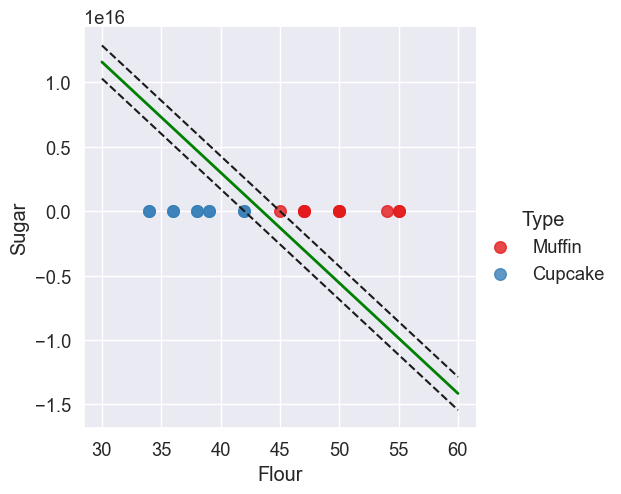

In [56]:
sns.lmplot(food,x='Flour',y='Sugar',hue='Type',
           palette='Set1',fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx,yy, linewidth=2,color='green')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [92]:

def Muffin_or_Cupcake(Flour,Sugar):
    if(model.predict([[Flour,Sugar]]))==0:
        print(name("Hi there  , You\'re Looking at a muffin Recipe!"))
    else:  
        print("Hi there , You\'re Looking at a Cupcake Recipe!")   

In [64]:
Muffin_or_Cupcake(Flour,Su)

Hi there , You're Looking at a Cupcake Recipe!


In [65]:
Muffin_or_Cupcake(50,10)

Hi there , You're Looking at a muffin Recipe!
